<a href="https://colab.research.google.com/github/anupkewat/LearningMachineLearning/blob/main/LearningMachineLearning/CNN/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



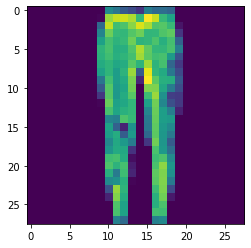

In [66]:
plt.imshow(x_train[78])

In [67]:
x_train=x_train/255

In [68]:
x_test=x_test/255

In [69]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [70]:
from tensorflow.keras.utils import to_categorical
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [72]:
model=Sequential()

In [73]:
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [74]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               589952    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [75]:
earlystopping=EarlyStopping(monitor='loss', patience=3)
val=(x_test,y_test_cat)

In [78]:
model.fit(x_train,y_train_cat,epochs=5,validation_data=val,callbacks=[earlystopping])

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1973 - accuracy: 0.9267 - val_loss: 0.2681 - val_accuracy: 0.9053
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1692 - accuracy: 0.9362 - val_loss: 0.2499 - val_accuracy: 0.9132
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1447 - accuracy: 0.9460 - val_loss: 0.2668 - val_accuracy: 0.9094
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1251 - accuracy: 0.9531 - val_loss: 0.2705 - val_accuracy: 0.9147
Epoch 5/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1044 - accuracy: 0.9613 - val_loss: 0.3001 - val_accuracy: 0.9092


In [80]:
hist=pd.DataFrame(model.history.history)

In [ ]:
predictions=model.predict(x_test)

In [88]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [100]:
p=[]
for r in range (0,len(predictions)):
  out=np.where(predictions[r]==predictions[r].max())
  p.append(out)

In [112]:
arr = []

In [113]:
for i in p:
  arr.append(i[0][0])

In [120]:
print(classification_report(y_test,arr))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.92      0.91      0.92      1000
           4       0.90      0.78      0.83      1000
           5       0.99      0.97      0.98      1000
           6       0.68      0.83      0.75      1000
           7       0.95      0.98      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [121]:
print(accuracy_score(y_test,arr))

0.9092
